## Using NLP to analyse the competitor gym reviews

##### Import Packages

In [6]:
# For dataframes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing all nltk related libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('all')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Subjectivity and Polarity
from textblob import TextBlob

# Regular Expressions
import re
import string

# Bag of Words representation
import collections
from sklearn.feature_extraction.text import CountVectorizer

# Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# To ignore warning
import warnings
warnings.filterwarnings("ignore")

# Emotion
# !pip install nrclex
from nrclex import NRCLex

# Mime type rendering
# !pip install nbformat
import nbformat

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\julia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\julia\AppData\Roaming\nltk_data...
[

### Fitness First

In [7]:
fitness_first = pd.read_csv('datasets/fitness-first-paya-reviews.csv')
fitness_first.shape

(197, 18)

### Virgin Active

##### Inspect the Data & Explore Data

In [8]:
virgin_active = pd.read_csv('datasets/virgin-active-paya-reviews.csv')
virgin_active.shape

(216, 18)

In [9]:
virgin_active.head()

,place_id,place_name,review_id,name,reviewer_profile,rating,review_text,published_at,published_at_date,response_from_owner_text,response_from_owner_ago,response_from_owner_date,review_likes_count,total_number_of_reviews_by_reviewer,total_number_of_photos_by_reviewer,is_local_guide,review_translated_text,response_from_owner_translated_text
0,ChIJgfCnragZ2jER9L5TfSSX0rg,Virgin Active Paya Lebar,ChdDSUhNMG9nS0VJQ0FnSUN2ak9QS2pnRRAB,Nas Radz,https://www.google.com/maps/contrib/1177844161...,5,The people at the counters are super nice & ac...,a day ago,2024-12-09T11:35:31,NaN,NaN,NaN,0,8.0,2.0,1.0,NaN,NaN
1,ChIJgfCnragZ2jER9L5TfSSX0rg,Virgin Active Paya Lebar,ChZDSUhNMG9nS0VJQ0FnSURQdGNXQ0tnEAE,Jade Sim,https://www.google.com/maps/contrib/1079996294...,5,Started trial pass this week and attended my f...,5 days ago,2024-12-05T11:35:31,NaN,NaN,NaN,0,14.0,NaN,NaN,NaN,NaN
2,ChIJgfCnragZ2jER9L5TfSSX0rg,Virgin Active Paya Lebar,ChdDSUhNMG9nS0VJQ0FnSUNQNF9iaW1BRRAB,Sonic Wang,https://www.google.com/maps/contrib/1067307136...,5,Zaidi is always very friendly with a warm welc...,a week ago,2024-12-03T11:35:31,Thank you for taking the time to share your ex...,a week ago,2024-12-03T11:35:31,0,27.0,5.0,1.0,NaN,NaN
3,ChIJgfCnragZ2jER9L5TfSSX0rg,Virgin Active Paya Lebar,ChZDSUhNMG9nS0VJQ0FnSUNQZzZ6U2JnEAE,Julius Uy,https://www.google.com/maps/contrib/1124395043...,5,Very good service. Especially when I lost my B...,a week ago,2024-12-03T11:35:31,Thank you for sharing your wonderful feedback!...,a week ago,2024-12-03T11:35:31,0,9.0,23.0,1.0,NaN,NaN
4,ChIJgfCnragZ2jER9L5TfSSX0rg,Virgin Active Paya Lebar,ChZDSUhNMG9nS0VJQ0FnSUNQLUkyQldnEAE,Ain Hamid,https://www.google.com/maps/contrib/1104709424...,4,Had a situation with one of my class bookings....,2 weeks ago,2024-11-26T11:35:31,NaN,NaN,NaN,1,5.0,NaN,NaN,NaN,NaN


In [10]:
virgin_active.nunique()

place_id                                 1
place_name                               1
review_id                              216
name                                   215
reviewer_profile                       215
rating                                   5
review_text                            162
published_at                            20
published_at_date                       27
response_from_owner_text               113
response_from_owner_ago                 13
response_from_owner_date                20
review_likes_count                      10
total_number_of_reviews_by_reviewer     80
total_number_of_photos_by_reviewer      78
is_local_guide                           1
review_translated_text                   4
response_from_owner_translated_text      0
dtype: int64

In [11]:
virgin_active_filtered = virgin_active[['rating','review_text','published_at_date']]
virgin_active_filtered.head(10)

,rating,review_text,published_at_date
0,5,The people at the counters are super nice & ac...,2024-12-09T11:35:31
1,5,Started trial pass this week and attended my f...,2024-12-05T11:35:31
2,5,Zaidi is always very friendly with a warm welc...,2024-12-03T11:35:31
3,5,Very good service. Especially when I lost my B...,2024-12-03T11:35:31
4,4,Had a situation with one of my class bookings....,2024-11-26T11:35:31
5,4,NaN,2024-11-10T11:35:31
6,5,The staff at the reception are all very friend...,2024-11-10T11:35:31
7,5,Great service by staff! Love hayati and suhail...,2024-11-10T11:35:31
8,1,"Wrong location on the map, nobody pick up the ...",2024-11-10T11:35:31
9,5,Working with Khai has genuinely transformed my...,2024-10-10T11:35:31


In [20]:
# The main set of data we will be preprocessing for detecting emotions -> review_text column
virgin_active_filtered['review_text']

0      The people at the counters are super nice & ac...
1      Started trial pass this week and attended my f...
2      Zaidi is always very friendly with a warm welc...
3      Very good service. Especially when I lost my B...
4      Had a situation with one of my class bookings....
                             ...                        
211                                      Love the place.
212    Most well equiped and positioned gym for the o...
213                                                  NaN
214                   Nice environment. Nice cold tower.
215                                                  NaN
Name: review_text, Length: 216, dtype: object

In [40]:
virgin_active_filtered.dtypes

rating                int64
review_text          object
published_at_date    object
dtype: object

In [52]:
# Extracting columns required to perform sentiment analysis
df_reviews1 = pd.DataFrame({'review_text': pd.Series(virgin_active_filtered['review_text']), 'language': pd.Series(virgin_active_filtered['rating'])})

In [59]:
df_reviews = virgin_active_filtered[['review_text', 'rating']]

In [60]:
df_reviews.equals(df_reviews1)

False

In [61]:
df_reviews.rename(columns={'review_text': 'review'}, inplace=True)
df_reviews.head(2)

,review,rating
0,The people at the counters are super nice & ac...,5
1,Started trial pass this week and attended my f...,5


In [62]:
df_reviews.dropna(inplace=True)

In [63]:
df_reviews.isnull().sum()

review    0
rating    0
dtype: int64

##### EDA

In [64]:
# Add a new column named "length" 
df_reviews['length'] = df_reviews['review'].astype(str).apply(len)
df_reviews.head(5)

,review,rating,length
0,The people at the counters are super nice & ac...,5,140
1,Started trial pass this week and attended my f...,5,211
2,Zaidi is always very friendly with a warm welc...,5,200
3,Very good service. Especially when I lost my B...,5,162
4,Had a situation with one of my class bookings....,4,195


<Axes: xlabel='rating'>

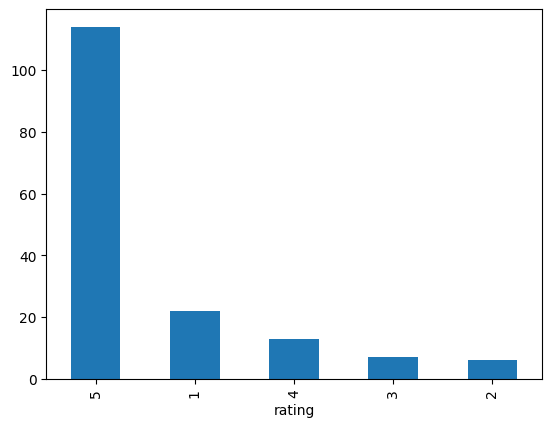

In [65]:
df_reviews['rating'].value_counts()[0:5].plot(kind = 'bar')

##### Data Cleaning

In [67]:
df_reviews

,review,rating,length
0,The people at the counters are super nice & ac...,5,140
1,Started trial pass this week and attended my f...,5,211
2,Zaidi is always very friendly with a warm welc...,5,200
3,Very good service. Especially when I lost my B...,5,162
4,Had a situation with one of my class bookings....,4,195
...,...,...,...
208,"One of the newest Virgin active centres, great...",5,122
209,Loving this gym,5,15
211,Love the place.,5,15
212,Most well equiped and positioned gym for the o...,5,57


In [68]:
# Setting lemmatizer variable
lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

In [69]:
# Processing Review data
def review_processor(tweet_Dataa):
  tweet_data = tweet_data.lower()
  # Removes any content that is in the format is "[example_text]"
  tweet_data = re.sub('\[.*?\]', '', tweet_data)
  # Remove any text that is not lowercased
  review_data = re.sub("[^a-z\s]", "", review_data)
  return(review_data)

In [71]:
# Apply the review_processor to the first row
df_reviews['review'][:1].apply(review_processor)

0    the people at the counters are super nice  acc...
Name: review, dtype: object

In [72]:
# Processing Review data in more detail
def review_processor(review_data):
  # Changing all tweet texts to be lowercase
  review_data = review_data.lower()

  # Removing punctuation
  review_data = re.sub('\[.*?\]', '', review_data)

  # Removing special characters and numbers
  review_data = re.sub("[^a-z\s]", "", review_data)

  # Removing hashtags
  review_data = re.sub("#", " ", review_data)

  # Removing RT
  review_data = re.sub("RT[\s]+", "", review_data)

  # Removing hyperlinks
  review_data = re.sub('https?://\S+|www\.\S+', '', review_data)

  review_data = re.sub('<.*?>+', '', review_data)

  review_data = re.sub('[%s]' % re.escape(string.punctuation), '', review_data)

  # Removing lines separated by \n
  review_data = re.sub('\n', '', review_data)

  # Removing usernames
  review_data = re.sub('\w*\d\w*', '', review_data)

  # Removing stopwords
  review_data = [word for word in review_data.split(' ') if word not in stopword]
  review_data = " ".join(review_data)

  # Lemmatisation
  review_data = [lemmatizer.lemmatize(word) for word in review_data.split(' ')]
  review_data = " ".join(review_data)
  # review_data = ",".join([str(i) for i in review_data])
  return review_data

In [73]:
# Copying dataframe and storing it in a new dataframe
processed_review_data = df_reviews.copy()

In [74]:
processed_review_data['Processed_review'] = df_reviews['review'].apply(review_processor)

##### Subjectivity and Polarity

In [77]:
# Subjectivity of the processed data from 0 to 1, 0 means neutral/facts, 1 means personal opinion
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [78]:
# Polarity of the processed data from -1 to 1, -1 means negative, 0 means neutral, 1 means positive
# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [79]:
# Creating columns to display subjectivity and polarity
processed_review_data['Subjectivity'] = processed_review_data['Processed_Review'].apply(getSubjectivity)
processed_review_data['Polarity'] = processed_review_data['Processed_Review'].apply(getPolarity)

In [80]:
processed_review_data

,review,rating,length,Processed_Review,Subjectivity,Polarity
0,The people at the counters are super nice & ac...,5,140,people counter super nice accommodating equip...,0.545238,0.347619
1,Started trial pass this week and attended my f...,5,211,started trial pas week attended first reformer...,0.381667,0.230000
2,Zaidi is always very friendly with a warm welc...,5,200,zaidi always friendly warm welcoming smile he ...,0.466667,0.290278
3,Very good service. Especially when I lost my B...,5,162,good service especially lost bose earphone phi...,0.733333,0.400000
4,Had a situation with one of my class bookings....,4,195,situation one class booking shocked upset howe...,0.450000,-0.250000
...,...,...,...,...,...,...
208,"One of the newest Virgin active centres, great...",5,122,one newest virgin active centre great class qu...,0.783333,0.555556
209,Loving this gym,5,15,loving gym,0.950000,0.600000
211,Love the place.,5,15,love place,0.600000,0.500000
212,Most well equiped and positioned gym for the o...,5,57,well equiped positioned gym office crowd,0.000000,0.000000


##### Word Cloud

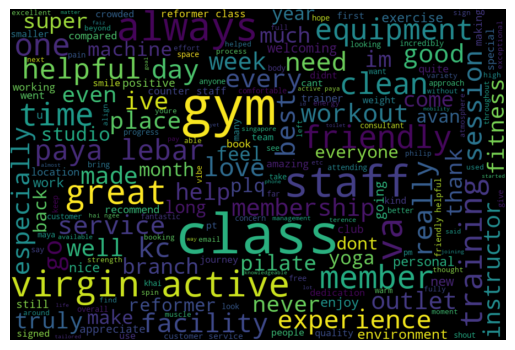

In [81]:
allReviews = ' '.join([review for review in processed_review_data['Processed_Review']])
RU_wordcloud=WordCloud(width=900, height=600, random_state=21, max_font_size=100).generate(allReviews)
plt.imshow(RU_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

##### Computing negative, neutral and positive analysis

In [82]:
def getComputation(score):
    if score < -0.5:
        return 'Very Negative'
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    elif score > 0:
        return 'Positive'
processed_review_data['Computation_Analysis'] = processed_review_data['Polarity'].apply(getComputation)

In [83]:
processed_review_data

,review,rating,length,Processed_Review,Subjectivity,Polarity,Computation_Analysis
0,The people at the counters are super nice & ac...,5,140,people counter super nice accommodating equip...,0.545238,0.347619,Positive
1,Started trial pass this week and attended my f...,5,211,started trial pas week attended first reformer...,0.381667,0.230000,Positive
2,Zaidi is always very friendly with a warm welc...,5,200,zaidi always friendly warm welcoming smile he ...,0.466667,0.290278,Positive
3,Very good service. Especially when I lost my B...,5,162,good service especially lost bose earphone phi...,0.733333,0.400000,Positive
4,Had a situation with one of my class bookings....,4,195,situation one class booking shocked upset howe...,0.450000,-0.250000,Negative
...,...,...,...,...,...,...,...
208,"One of the newest Virgin active centres, great...",5,122,one newest virgin active centre great class qu...,0.783333,0.555556,Positive
209,Loving this gym,5,15,loving gym,0.950000,0.600000,Positive
211,Love the place.,5,15,love place,0.600000,0.500000,Positive
212,Most well equiped and positioned gym for the o...,5,57,well equiped positioned gym office crowd,0.000000,0.000000,Neutral
